###### FileName :  Model Training
###### Date     : 2-03-2021
###### Author   : Muhammad Hassaan Bashir

## Importing Required Libraries

In [ ]:
# ==================================
# Importing libraries
# ==================================

# operating system code library for file open and creation
import os
# using to make arrays anfd apply mathematical expressions
import numpy as np
# using for plotting images on graph
import matplotlib.pyplot as plt
# using for convolution technique
import tensorflow as tf
from tensorflow import keras
# For Reading CSV data
import pandas as pd
# For Plotting images and data view
from matplotlib import pyplot
# From SciKit learn we are using train test split module to divide our data into training and testing dataset
from sklearn.model_selection import train_test_split
# For Image Processing
import cv2

## Common Variables

In [ ]:
IMG_SIZE = 48
channels = 1

## Reading Dataset CSV

In [ ]:
df = pd.read_csv('fer2013.csv')

In [ ]:
# Checking Dataset using head fucntion of panda library
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


###### As we can see above the emotions are tagged as 0,1,2,3,4,5,6, numbers so we will get the unique elemnts using unique function to know the number of emotions in dataset

In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

## Creating Key Value pair or dictionary of emotions

In [ ]:
label_to_text = { 0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4:'sadness', 5:'surprise', 6:'neutral' }

## Plotting some images to review the dataset

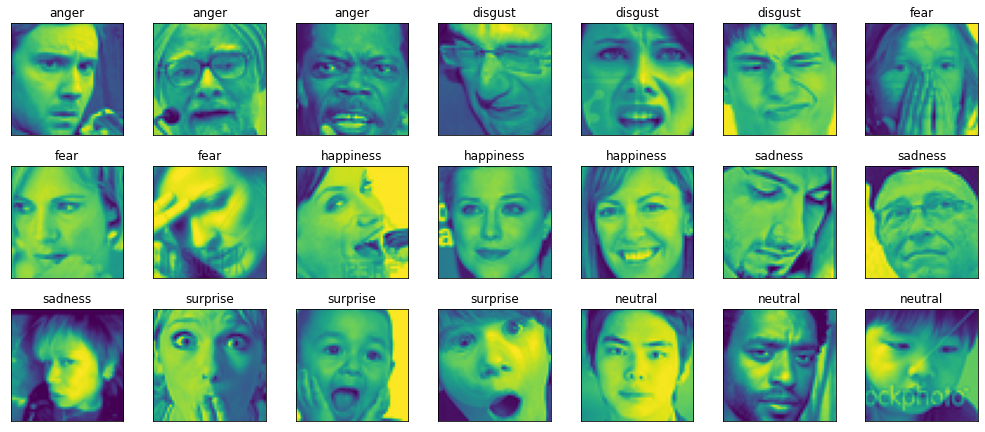

In [ ]:
# Using Matplot lib figure function to plot images
fig = pyplot.figure(1, (14, 14))
# Counter variable for image plotting positions
k = 0
# Main loop that will get the unique emotion each time
for label in sorted(df.emotion.unique()):
    # Each emotion will be plotted 3 times using different images
    for j in range(3):
        # Using Pixels columns from csv to create image data
        px = df[df.emotion==label].pixels.iloc[k]
        # Creating Numpy array class to create image with reshape function to 48x48
        px = np.array(px.split(' ')).reshape(IMG_SIZE, IMG_SIZE).astype('float32')
        # Number of Image Counter
        k += 1
        # Subplotting at postions k
        ax = pyplot.subplot(7, 7, k)
        # using imshow function to place position at k
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        # Set Title of Image
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

## Using Lambda Function to create Image Array using pixel values and reshape it to 48x48
**Images are reshape to 48x48 as the number of pixels we have is 2304 i.e. 48x48 = 2304**

In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(IMG_SIZE, IMG_SIZE, channels).astype('float32'))

In [ ]:
# Stacking images on each other properly in order to read them when needed
img_array = np.stack(img_array, axis=0)

In [ ]:
# Check the shape of Image Array
img_array.shape  
#(w,x,y,z,) w --> Number of Images, x--> Image width, y --> Image Height, z --> Number of Image channel (1 for GS, and 3 for RGB)

# Random shuffling of images for training
# tf.random.shuffle(img_array, seed=3)

(35887, 48, 48, 1)

In [ ]:
# Images Label
labels = df.emotion.values

## Splitting up data into 2 parts TRAIN and TEST using SciKit-Learn train_test_split function

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(img_array, labels, test_size=0.2)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen2 = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)
datagen2.fit(X_test)

In [ ]:
# Check the shape of dataset
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((28709, 48, 48, 1), (28709,), (7178, 48, 48, 1), (7178,))

In [ ]:
# Normalize the Images by dividing it with 255 the max pixel value
X_train = X_train/255
X_test = X_test/255


## Designing CNN based model

In [ ]:

basemodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        # tf.keras.layers.Dropout(0.5),
                                        # tf.keras.layers.Dense(2000,activation='relu'),
                                        # tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dropout(0.8),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])


basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
# Filename of model to be stored so will later utilized in the Testing Notebook
file_name = 'base_model_new.h5'

# Call back function that will be called by model.fit function of tensorflow module on each epoch that will look for the
# validation accuracy and compared it with the previous one, if it enhances then it will save the new model other wise previous
# model is save as it is
call_back = tf.keras.callbacks.ModelCheckpoint(filepath=file_name, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

# Compiling the model with RMSProp optimizer, and sparse_categorical_crossentropy as have not one hot encode our labels
basemodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Start Model.fit to start training the model
basemodel.fit(X_train, Y_train, epochs=50, callbacks=call_back, validation_data=(X_test,Y_test))

Epoch 1/50
897/898 [============================>.] - ETA: 0s - loss: 1.8263 - accuracy: 0.2407
Epoch 00001: val_accuracy improved from -inf to 0.25857, saving model to base_model_new.h5
898/898 [==============================] - 113s 126ms/step - loss: 1.8263 - accuracy: 0.2407 - val_loss: 1.7948 - val_accuracy: 0.2586
Epoch 2/50
191/898 [=====>........................] - ETA: 1:25 - loss: 1.7954 - accuracy: 0.2551

## Model Prediction using some test data set

In [ ]:
# Load saved Model
base_model = tf.keras.models.load_model('checkpoint/base_model.h5')

# Import random module of python to generate random number
import random

# For loop for 10 number of images prediction
for i in range(0,10):
    # Generate random number but with in number of test dataset
    n = random.randint(0,10767)
    # Predict and Print Result
    print(f"Image :{n} \tPrediction: {basemodel.predict(tf.expand_dims(X_test[n],0)).argmax()} \tExpected: {Y_test[n]} \tSaved Model: {base_model.predict(tf.expand_dims(X_test[n],0)).argmax()}")  

Image :9089 	Prediction: 3 	Expected: 3 	Saved Model: 3
Image :8316 	Prediction: 2 	Expected: 6 	Saved Model: 4
Image :10314 	Prediction: 3 	Expected: 4 	Saved Model: 3
Image :9003 	Prediction: 0 	Expected: 3 	Saved Model: 3
Image :1641 	Prediction: 6 	Expected: 2 	Saved Model: 6
Image :7149 	Prediction: 5 	Expected: 2 	Saved Model: 5
Image :2671 	Prediction: 6 	Expected: 6 	Saved Model: 6
Image :1724 	Prediction: 3 	Expected: 3 	Saved Model: 3
Image :847 	Prediction: 4 	Expected: 4 	Saved Model: 6
Image :7197 	Prediction: 4 	Expected: 2 	Saved Model: 4
